## Input modules

In [1]:
# NWB related
from pynwb import NWBHDF5IO                        # to read/write

# matrix computation
import numpy as np
from scipy import stats

# dimensionality reduction, clustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# figure
import matplotlib.pyplot as plt

## read NWB file

In [2]:
base_path = "/Volumes/TJ_exHDD2/NPX/V4_PFC_Cooling/"; 
nwb_filename = base_path + 'wf_220428_220603.nwb'

with NWBHDF5IO(nwb_filename, 'r') as io:
    nwbfile = io.read(); 
    units = nwbfile.units.to_dataframe(); 
    trials = nwbfile.trials.to_dataframe(); 

- units dataframe

In [3]:
units

,session,probe,unitID,location,depth,avgWF,normWF,spike_times,psth,CoV,res_temp_r
id,,,,,,,,,,,
0,l220428,probe0,14,V4,1220,"[-15.242637362637362, -15.315824175824176, -15...","[0.00793764562676319, 0.00389228904012086, 0.0...","[18.179833333333335, 25.1715, 25.1737, 32.4072...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0967665099923067, 0.4355894597756734]","[-0.0030088627697726234, 0.9486296112265324]"
1,l220428,probe0,216,V4,1360,"[3.403794924522129, 3.3703322895733048, 3.3244...","[0.018291383490280408, 0.015269897602856106, 0...","[16.5696, 17.238866666666667, 17.2452333333333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.7331061485097305, 0.5519401181941415]","[0.16372901382267935, 0.0004160083406284395]"
2,l220428,probe0,23,V4,1380,"[-12.18078991284999, -12.214908214351938, -12....","[-0.0017727873038836414, -0.004293597689622519...","[25.154033333333334, 25.2766, 25.7809666666666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.8718791368761939, 0.6719347279279582]","[0.10054516406220794, 0.030896161783500905]"
3,l220428,probe0,24,V4,1400,"[-1.5407158665954361, -1.5742959627566206, -1....","[0.0018808231578111819, 2.987465873538199e-06,...","[24.108733333333333, 25.6515, 25.9647333333333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.1533449962984945, 0.6257687834563135]","[0.1693155726556304, 0.0002603175284946287]"
4,l220428,probe0,207,V4,1400,"[1.2775229357798166, 1.2101700604162005, 1.305...","[0.0022254274664734127, -0.012981239217033438,...","[16.574233333333332, 16.708466666666666, 16.86...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.5509929454014156, 0.30603421101916406]","[-0.20607637464614156, 8.172989008745139e-06]"
...,...,...,...,...,...,...,...,...,...,...,...
773,l220603,probe1,105,PFC,2040,"[-13.557893260396943, -13.552352899922855, -13...","[0.0037563656887230484, 0.004201572934104758, ...","[711.6944333333333, 770.4023, 882.237, 1160.33...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.853789158966871, 1.6691102505171342]","[0.2554247701745464, 1.8126016884934574e-07]"
774,l220603,probe1,161,PFC,2080,"[-4.333196102648552, -4.277068752573076, -4.31...","[-0.005798564410809064, -0.0028663032287852223...","[602.4887, 602.5362333333334, 603.427733333333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.889488759377637, 0.7386531872514437]","[-0.05005905893604462, 0.31432748331275284]"
775,l220603,probe1,191,PFC,2080,"[-4.370592149035263, -4.295741849634065, -4.26...","[-0.0057580590409212805, -0.000954339040152680...","[763.0292666666667, 806.6539, 822.499933333333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[3.560866720358051, 1.3614001483766387]","[-0.03932224991237237, 0.429420225908012]"


- trials dataframe

In [4]:
trials

,start_time,stop_time,session,trialNum,ref_stimID,test_stimID,pdOnTS,pdOffTS,correct,RT,occl_width,dir,cooling_temp
id,,,,,,,,,,,,,
0,16.534975,18.034975,l220428,1,31,31,"[17.034974966131948, 17.660066265327984]","[17.433582171384938, 18.166995428616605]",1,492,33,110,30
1,24.002670,25.502670,l220428,2,8,31,"[24.502669952732603, 25.12776125192864]","[24.901277157985593, 25.57636936100162]",1,432,0,290,30
2,31.245321,32.745321,l220428,3,8,31,"[31.745320871420233, 32.37041217061627]","[32.14392807667323, 32.84402073159925]",1,457,52,290,30
3,38.738016,40.238016,l220428,4,31,31,"[39.238016309930885, 39.86310760912692]","[39.63662351518388, 40.3283560189912]",1,451,52,110,30
4,46.172391,47.672391,l220428,5,8,8,"[46.672390694225896, 47.28912184230323]","[47.070957898755836, 47.73772995137622]",1,431,0,290,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,3969.003746,3970.503746,l220603,402,31,23,"[3969.50374643148, 3970.1204726075152]","[3969.9020304199857, 3970.5937573470956]",1,453,57,135,26
4566,3977.471471,3978.971471,l220603,403,31,23,"[3977.9714712291875, 3978.5881974052227]","[3978.3697552176936, 3979.069842228523]",1,459,0,135,26
4567,3986.047557,3987.547557,l220603,404,31,23,"[3986.547557112048, 3987.1726433718027]","[3986.945881100954, 3987.637608028064]",1,445,0,135,26


## Check Insconsistency across Trials

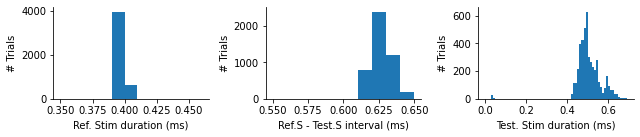

In [7]:
isi = np.full((len(trials),2),np.nan); 
stim_dur = np.full((len(trials),3),np.nan); 
stim_dur[:] = np.nan; 
for i in range(len(trials)):
    n_pdOn = len(trials['pdOnTS'][i]); 
    dur_now = trials['pdOffTS'][i]-trials['pdOnTS'][i]; 
    isi_now = trials['pdOnTS'][i][1:]-trials['pdOnTS'][i][:-1]; 

    stim_dur[i,:n_pdOn] = dur_now; 
    isi[i,:n_pdOn-1] = isi_now; 

plt.figure(figsize=(9,2))
plt.subplot(1,3,1); 
plt.hist(stim_dur[:,0],np.arange(0.35,0.46,0.01)); 
plt.xlabel('Ref. Stim duration (ms)')
plt.ylabel('# Trials')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.subplot(1,3,2); 
plt.hist(isi[:,0],np.arange(0.55,0.66,0.01)); 
plt.xlabel('Ref.S - Test.S interval (ms)')
plt.ylabel('# Trials')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.subplot(1,3,3); 
plt.hist(stim_dur[:,1],np.arange(0,0.7,0.01)); 
plt.xlabel('Test. Stim duration (ms)')
plt.ylabel('# Trials')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.tight_layout()

## Example PSTHs

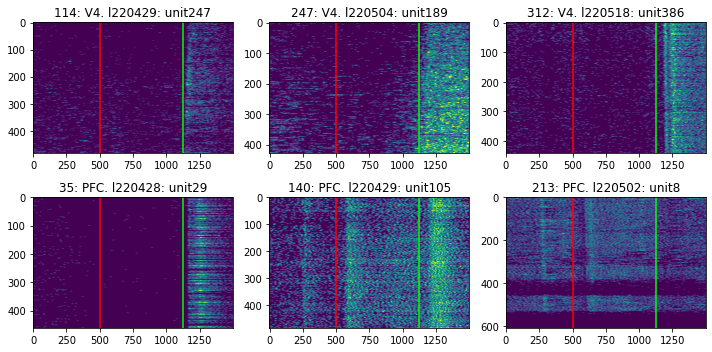

In [8]:
#%% Example PSTHs
## 114 (V4), 247 (V4), 312 (V4)
## 35 (PFC), 140 (PFC), 213 (PFC)
unit_num = [114, 247, 312, 35, 140, 213]; 
plt.figure(figsize=(10,5)); 
for u in range(len(unit_num)):
    i = unit_num[u]; 
    plt.subplot(2,3,u+1); 
    plt.imshow(units['psth'][i],vmin=0,vmax=np.max(units['psth'][i])*0.5, aspect='auto'); 
    plt.axvline(x=500,color=(1,0,0)); 
    plt.axvline(x=500+625,color=(0,1,0)); 
    plt.title(f"{i}: {units['location'][i]}. {units['session'][i]}: unit{+units['unitID'][i]}")
plt.tight_layout()

## Session averages

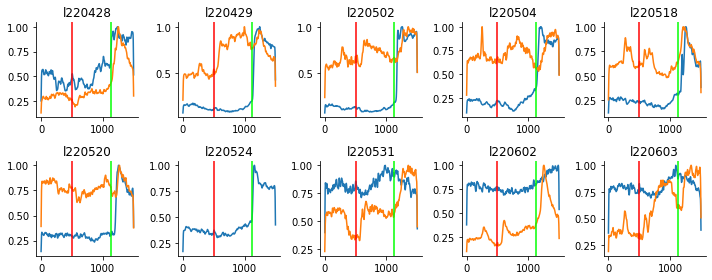

In [9]:
sessions = units['session'].unique(); 

plt.figure(figsize=(10,4)); 
for s in range(len(sessions)):
    s_name = sessions[s]; 
    v4_units = np.where((units['session']==s_name) & (units['location']=='V4'))[0]; 
    pfc_units = np.where((units['session']==s_name) & (units['location']=='PFC'))[0]; 

    plt.subplot(2,5,s+1); 
    if len(v4_units)>0:
        v4_psth = np.mean(np.mean(np.stack(units['psth'][v4_units].values),axis=0),axis=0); 
        plt.plot(v4_psth/np.max(v4_psth), color='C0');     
    if len(pfc_units)>0:
        pfc_psth = np.mean(np.mean(np.stack(units['psth'][pfc_units].values),axis=0),axis=0); 
        plt.plot(pfc_psth/np.max(pfc_psth), color='C1');         
    plt.axvline(x=500, color=(1,0,0)); 
    plt.axvline(x=500+625, color=(0,1,0));     
    plt.gca().spines[['right', 'top']].set_visible(False)
    plt.title(s_name); 
plt.tight_layout(); 

## Noisy cells

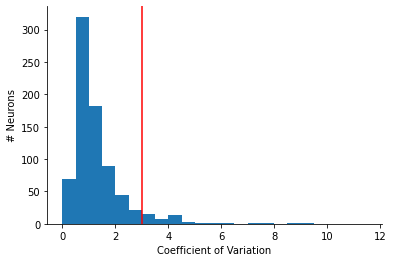

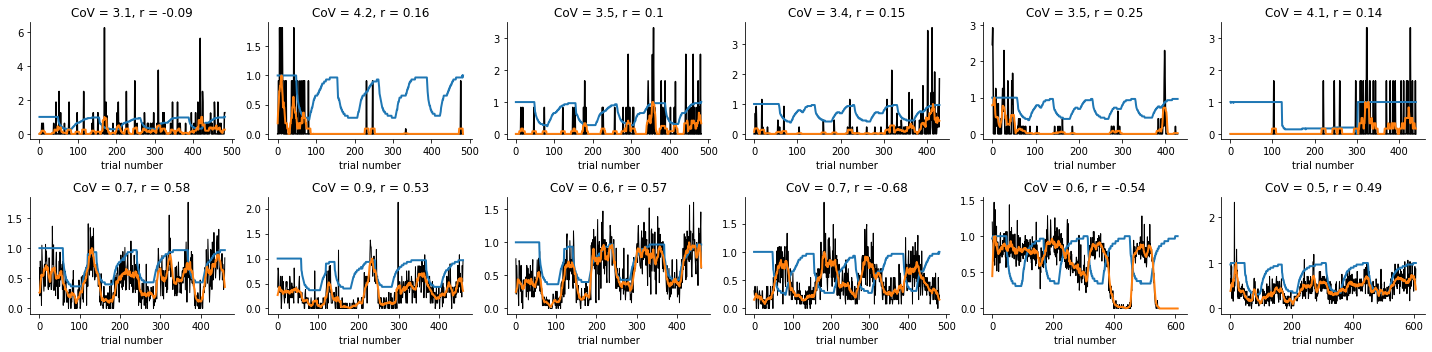

In [33]:
CoV = np.stack(units['CoV'].values);
res_temp_r = np.stack(units['res_temp_r'].values); 

plt.gca().spines[['right', 'top']].set_visible(False)
plt.hist(CoV[:,0],np.arange(0,12,0.5))
plt.axvline(x=3,color=(1,0,0))
plt.xlabel('Coefficient of Variation'); 
plt.ylabel('# Neurons'); 

bad_examples = np.where((CoV[:,0]>3) & (np.abs(res_temp_r[:,1])<0.05))[0]; 
good_examples = np.where((CoV[:,0]<1) & (np.abs(res_temp_r[:,0])>0.4))[0]; 

plt.figure(figsize=(20,5)); 
for u in range(6):
    i = bad_examples[u];

    session = units['session'][i]; 
    temp = trials[trials['session']==session]['cooling_temp'].values; 

    respNow1 = np.mean(np.array(units['psth'][i])[:,500:],axis=1);             
    respNow2 = np.convolve(respNow1,np.ones(10)/10,mode='same'); 
    r,p = stats.pearsonr(respNow1, temp); 

    plt.subplot(2,6,u+1)
    plt.plot(respNow1/np.max(respNow2),'k');
    plt.plot(temp/np.max(temp),linewidth=2); 
    plt.plot(respNow2/np.max(respNow2),linewidth=2); 
    #plt.title(f"CoV = {round(CoV[i,0],1)}, r = {round(res_temp_r[i,0],2)}, p = {round(res_temp_r[i,1],2)}")
    plt.title(f"CoV = {round(CoV[i,0],1)}, r = {round(res_temp_r[i,0],2)}")
    plt.xlabel('trial number')
    plt.gca().spines[['right', 'top']].set_visible(False); 

    j = good_examples[u]; 

    session = units['session'][j]; 
    temp = trials[trials['session']==session]['cooling_temp'].values; 

    respNow1 = np.mean(np.array(units['psth'][j])[:,500:],axis=1);             
    respNow2 = np.convolve(respNow1,np.ones(10)/10,mode='same'); 
    r,p = stats.pearsonr(respNow1, temp); 

    plt.subplot(2,6,u+7)
    plt.plot(respNow1/np.max(respNow2),'k',linewidth=1);
    plt.plot(temp/np.max(temp),linewidth=2); 
    plt.plot(respNow2/np.max(respNow2),linewidth=2); 
    #plt.title(f"CoV = {round(CoV[j,0],1)}, r = {round(res_temp_r[j,0],2)}, p = {round(res_temp_r[j,1],2)}")
    plt.title(f"CoV = {round(CoV[j,0],1)}, r = {round(res_temp_r[j,0],2)}")    
    plt.xlabel('trial number')
    plt.gca().spines[['right', 'top']].set_visible(False); 

plt.tight_layout(); 

## Response - Temperature correlation histogram

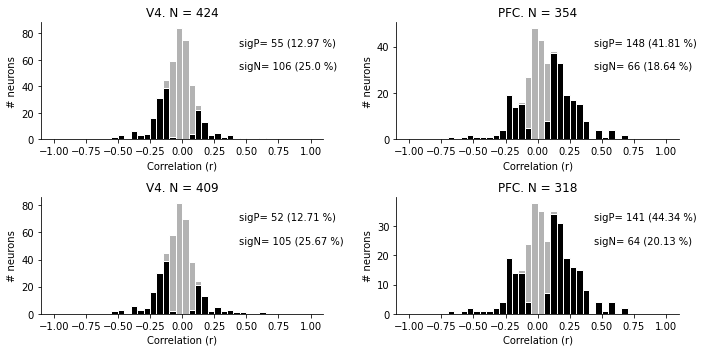

In [65]:
plt.figure(figsize=(10,5))
for i in range(2):
    if i==0:
        v4_valid = np.where((units['location']=='V4'))[0]
        pfc_valid = np.where((units['location']=='PFC'))[0]
    elif i==1:
        v4_valid = np.where((units['location']=='V4') &
                            (CoV[:,0]<3))[0]

        pfc_valid = np.where((units['location']=='PFC') &
                            (CoV[:,0]<3))[0]

    plt.subplot(2,2,i*2+1); 
    plt.hist(res_temp_r[v4_valid,0], np.arange(-1,1.05,0.05), color=(0.7,0.7,0.7), ec=(1,1,1));
    signi = np.where(res_temp_r[v4_valid,1]<0.05)[0]; 
    plt.hist(res_temp_r[v4_valid[signi],0],np.arange(-1,1.05,0.05), color=(0,0,0), ec=(1,1,1)); 
    plt.gca().spines[['right', 'top']].set_visible(False); 
    signi_p = np.where((res_temp_r[v4_valid,1]<0.05) & (res_temp_r[v4_valid,0]>0))[0] 
    signi_n = np.where((res_temp_r[v4_valid,1]<0.05) & (res_temp_r[v4_valid,0]<0))[0] 
    plt.text(0.7,0.8,f"sigP= {len(signi_p)} ({round(100*len(signi_p)/len(v4_valid),2)} %)", transform=plt.gca().transAxes); 
    plt.text(0.7,0.6,f"sigN= {len(signi_n)} ({round(100*len(signi_n)/len(v4_valid),2)} %)", transform=plt.gca().transAxes); 
    plt.xlabel('Correlation (r)')
    plt.ylabel('# neurons')
    plt.title(f"V4. N = {len(v4_valid)}");     

    plt.subplot(2,2,i*2+2); 
    plt.hist(res_temp_r[pfc_valid,0], np.arange(-1,1.05,0.05), color=(0.7,0.7,0.7), ec=(1,1,1));
    signi = np.where(res_temp_r[pfc_valid,1]<0.05)[0]; 
    plt.hist(res_temp_r[pfc_valid[signi],0],np.arange(-1,1.05,0.05), color=(0,0,0), ec=(1,1,1)); 
    plt.gca().spines[['right', 'top']].set_visible(False); 
    signi_p = np.where((res_temp_r[pfc_valid,1]<0.05) & (res_temp_r[pfc_valid,0]>0))[0] 
    signi_n = np.where((res_temp_r[pfc_valid,1]<0.05) & (res_temp_r[pfc_valid,0]<0))[0] 
    plt.text(0.7,0.8,f"sigP= {len(signi_p)} ({round(100*len(signi_p)/len(pfc_valid),2)} %)", transform=plt.gca().transAxes); 
    plt.text(0.7,0.6,f"sigN= {len(signi_n)} ({round(100*len(signi_n)/len(pfc_valid),2)} %)", transform=plt.gca().transAxes); 
    plt.xlabel('Correlation (r)')
    plt.ylabel('# neurons')
    plt.title(f"PFC. N = {len(pfc_valid)}"); 

plt.tight_layout(); 

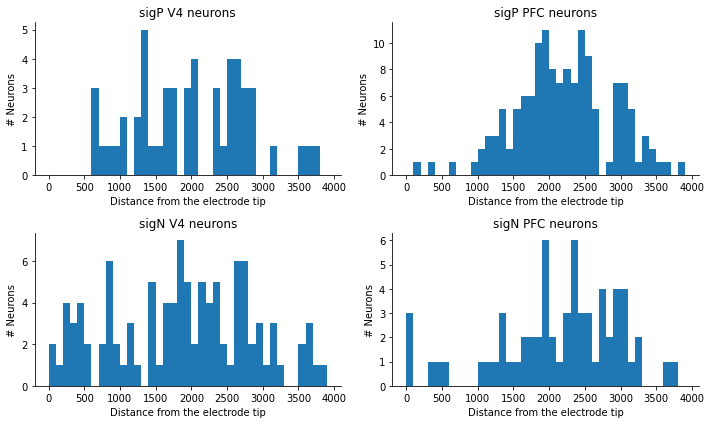

In [72]:
v4_sigP = np.where((units['location']=='V4') & (CoV[:,0]<3) & (res_temp_r[:,1]<0.05) & (res_temp_r[:,0]>0))[0]
v4_sigN = np.where((units['location']=='V4') & (CoV[:,0]<3) & (res_temp_r[:,1]<0.05) & (res_temp_r[:,0]<0))[0]
pfc_sigP = np.where((units['location']=='PFC') & (CoV[:,0]<3) & (res_temp_r[:,1]<0.05) & (res_temp_r[:,0]>0))[0]
pfc_sigN = np.where((units['location']=='PFC') & (CoV[:,0]<3) & (res_temp_r[:,1]<0.05) & (res_temp_r[:,0]<0))[0]

plt.figure(figsize=(10,6))

plt.subplot(2,2,1); 
plt.hist(units['depth'][v4_sigP],np.arange(0,4000,100)); 
plt.title('sigP V4 neurons'); 
plt.xlabel('Distance from the electrode tip'); 
plt.ylabel('# Neurons'); 
plt.gca().spines[['right', 'top']].set_visible(False); 

plt.subplot(2,2,3); 
plt.hist(units['depth'][v4_sigN],np.arange(0,4000,100)); 
plt.title('sigN V4 neurons'); 
plt.xlabel('Distance from the electrode tip'); 
plt.ylabel('# Neurons'); 
plt.gca().spines[['right', 'top']].set_visible(False); 

plt.subplot(2,2,2); 
plt.hist(units['depth'][pfc_sigP],np.arange(0,4000,100)); 
plt.title('sigP PFC neurons'); 
plt.xlabel('Distance from the electrode tip'); 
plt.ylabel('# Neurons'); 
plt.gca().spines[['right', 'top']].set_visible(False); 

plt.subplot(2,2,4); 
plt.hist(units['depth'][pfc_sigN],np.arange(0,4000,100)); 
plt.title('sigN PFC neurons'); 
plt.xlabel('Distance from the electrode tip'); 
plt.ylabel('# Neurons'); 
plt.gca().spines[['right', 'top']].set_visible(False); 

plt.tight_layout()

## Waveform clustering

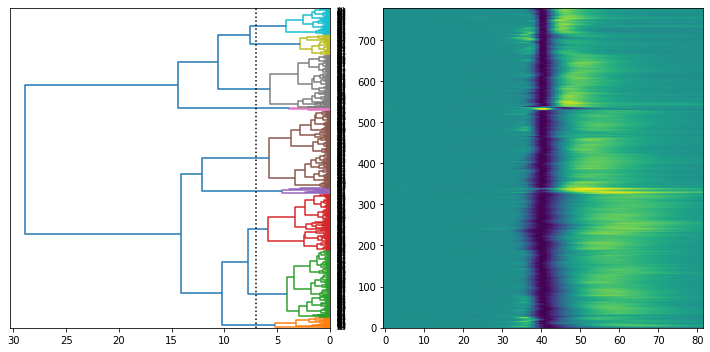

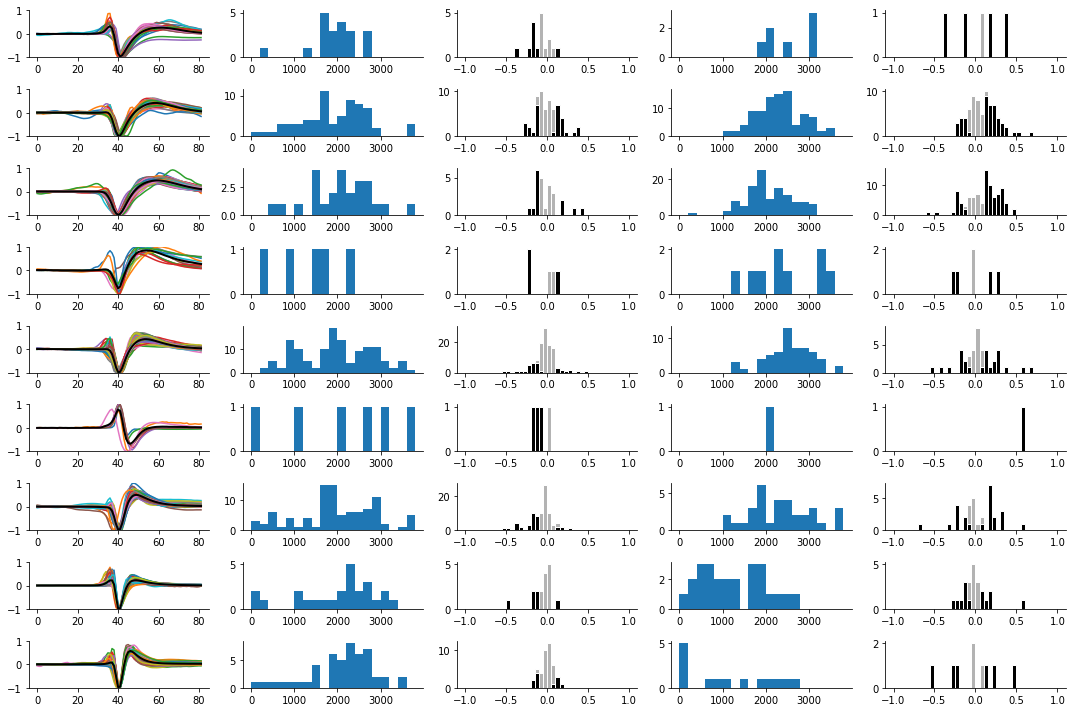

In [61]:
normWFs = np.stack(units['normWF'].values); 
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
reduced_normWFs = pca.fit_transform(normWFs[:,25:])

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(reduced_normWFs, 'ward')


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); 
thres = 7; 
D = dendrogram(Z, distance_sort=True, color_threshold=thres, orientation='left'); 
plt.axvline(x=thres, color='k', linestyle=':')
clusters = fcluster(Z, thres,  criterion='distance'); 
plt.subplot(1,2,2); 
plt.imshow(normWFs[D['leaves'],:], aspect='auto', origin='lower'); 
plt.tight_layout(); 

plt.figure(figsize=(15,10)); 
uniqueC = np.unique(clusters); 
for i in range(len(uniqueC)): 
    plt.subplot(9,5,i*5+1)
    unitNow = np.where(clusters==uniqueC[i])[0]; 
    plt.plot(normWFs[unitNow,:].T); 
    plt.plot(np.mean(normWFs[unitNow,:],axis=0),'k',linewidth=2)
    plt.ylim([-1,1])
    plt.gca().spines[['right', 'top']].set_visible(False);     

    v4_units = np.where((units['location']=='V4') & (clusters==uniqueC[i]))[0]
    plt.subplot(9,5,i*5+2); 
    plt.hist(units['depth'][v4_units],np.arange(0,4000,200)); 
    plt.gca().spines[['right', 'top']].set_visible(False);     
    """    
    depthM = []; 
    for u in range(len(v4_units)):
        uNow = v4_units[u]; 
        session = units['session'][uNow]; 
        medianDepth = units[(units['session']==session) & (units['location']=='V4')]['depth'].median()
        depthM.append(units['depth'][uNow]-medianDepth); 
    plt.hist(depthM,np.arange(-2000,2000,200)); 
    """

    r_v4 = []; 
    for u in range(len(v4_units)):
        uNow = v4_units[u]; 
        session = units['session'][uNow]; 
        temp = trials[trials['session']==session]['cooling_temp'].values; 
        
        if units['CoV'][uNow][0] < 2:
            respNow1 = np.mean(np.array(units['psth'][uNow])[:,500:],axis=1);             
            respNow2 = np.convolve(respNow1,np.ones(10)/10,mode='same'); 
            r,p = stats.pearsonr(respNow1, temp); 
            r_v4.append([r,p]); 
    r_v4 = np.array(r_v4);     
    plt.subplot(9,5,i*5+3);
    plt.hist(r_v4[:,0],np.arange(-1,1.05,0.05),color=(0.7,0.7,0.7),ec=(1,1,1)); 
    signi = np.where(r_v4[:,1]<0.05)[0]; 
    plt.hist(r_v4[signi,0],np.arange(-1,1.05,0.05),color=(0,0,0),ec=(1,1,1)); 
    plt.gca().spines[['right', 'top']].set_visible(False);     


    pfc_units = np.where((units['location']=='PFC') & (clusters==uniqueC[i]))[0]
    plt.subplot(9,5,i*5+4); 
    plt.hist(units['depth'][pfc_units],np.arange(0,4000,200)); 
    plt.gca().spines[['right', 'top']].set_visible(False);     
    """    
    depthM = []; 
    for u in range(len(pfc_units)):
        uNow = pfc_units[u]; 
        session = units['session'][uNow]; 
        medianDepth = units[(units['session']==session) & (units['location']=='PFC')]['depth'].median()
        depthM.append(units['depth'][uNow]-medianDepth); 
    plt.hist(depthM,np.arange(-2000,2000,200)); 
    """

    r_pfc = []; 
    for u in range(len(pfc_units)):
        uNow = pfc_units[u]; 
        session = units['session'][uNow]; 
        temp = trials[trials['session']==session]['cooling_temp'].values; 
        
        if units['CoV'][uNow][0] < 2:
            respNow1 = np.mean(np.array(units['psth'][uNow])[:,500:],axis=1);             
            respNow2 = np.convolve(respNow1,np.ones(10)/10,mode='same'); 
            r,p = stats.pearsonr(respNow1, temp); 
            r_pfc.append([r,p]); 
    r_pfc = np.array(r_pfc);     
    plt.subplot(9,5,i*5+5);
    plt.hist(r_pfc[:,0],np.arange(-1,1.05,0.05),color=(0.7,0.7,0.7),ec=(1,1,1)); 
    signi = np.where(r_pfc[:,1]<0.05)[0]; 
    plt.hist(r_pfc[signi,0],np.arange(-1,1.05,0.05),color=(0,0,0),ec=(1,1,1)); 
    plt.gca().spines[['right', 'top']].set_visible(False); 

plt.tight_layout(); 

## Cross-correlogram analysis

In [73]:
#%% cross-correlogram
def compute_ccg(st1, st2, samp_rate=30000):
    st1 = st1/samp_rate * 1000; 
    st2 = st2/samp_rate * 1000; 

    i = 0; 
    j = 0; 
    arr = []; 
    for t in st1:
        while i < len(st2) and st2[i] < t-25: # Not in the window
            i += 1                                # start point 
        while j < len(st2) and st2[j] < t+25:
            j += 1                                # end point
        #arr.extend(st2[i:j]-t)            
        addNow = st2[i:j]-t; 
        addNow_nonZero = addNow[np.where(addNow!=0.0)[0]]; 
        arr.extend(addNow_nonZero);             
    return np.array(arr); 

cell117,118 were computed
cell117,119 were computed
cell117,120 were computed
cell117,121 were computed
cell117,122 were computed
cell117,123 were computed
cell117,124 were computed
cell117,125 were computed
cell117,126 were computed
cell117,127 were computed
cell117,128 were computed
cell117,129 were computed
cell117,130 were computed
cell117,131 were computed
cell117,132 were computed
cell117,133 were computed
cell117,134 were computed
cell117,135 were computed
cell117,136 were computed
cell117,137 were computed
cell117,138 were computed
cell117,139 were computed
cell117,140 were computed
cell117,141 were computed
cell117,142 were computed
cell117,143 were computed
cell117,144 were computed
cell117,145 were computed
cell117,146 were computed
cell117,147 were computed
cell117,148 were computed
cell117,149 were computed
cell117,150 were computed
cell117,151 were computed
cell117,152 were computed
cell117,153 were computed
cell117,154 were computed
cell117,155 were computed
cell117,156 

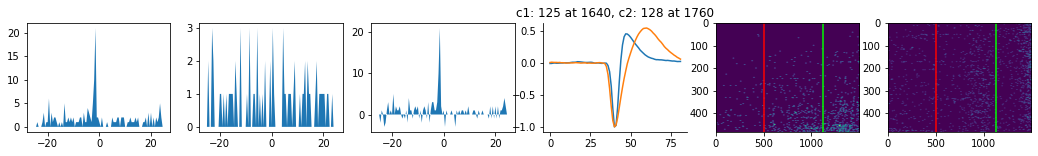

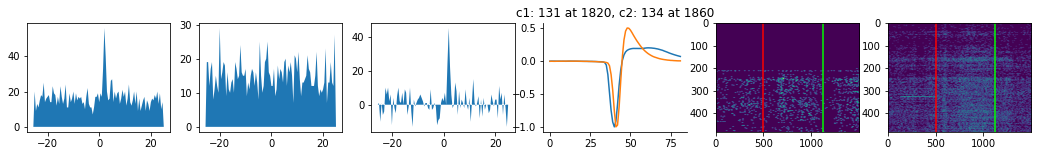

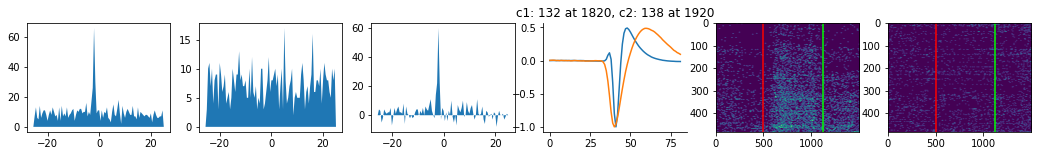

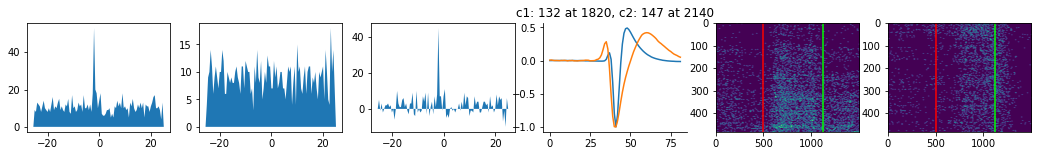

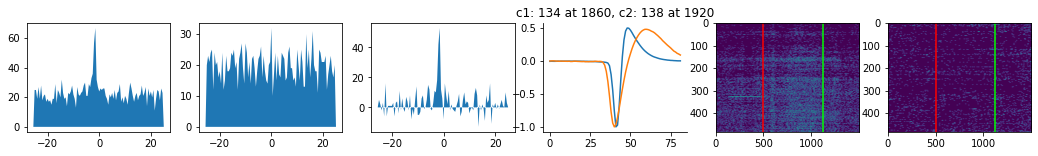

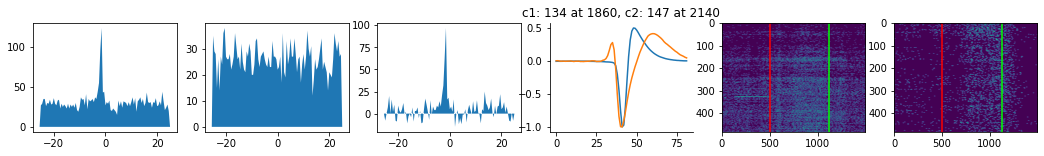

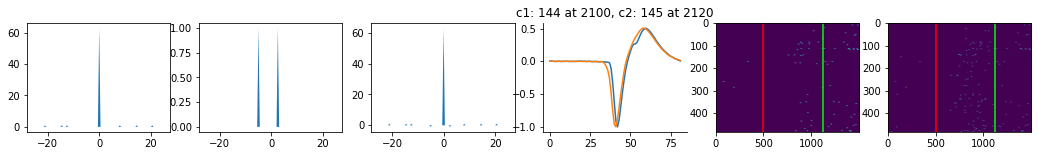

In [125]:
# PFC sessions: 1
cells = np.where((units['location']=='PFC') & (units['session']==sessions[1]))[0]

for i in range(len(cells)-1):
    for j in range(i+1,len(cells)): 

        st1 = []; 
        st2 = []; 
        st2_shifted = []; 
        for t in range(len(tNums)): 
            spk1 = np.where((units['spike_times'][cells[i]]>trials['start_time'][tNums[t]]) & 
                            (units['spike_times'][cells[i]]<trials['start_time'][tNums[t]]+1.5))[0]
            st1_now = units['spike_times'][cells[i]][spk1] - trials['start_time'][tNums[t]] + t*2; 

            spk2 = np.where((units['spike_times'][cells[j]]>trials['start_time'][tNums[t]]) & 
                            (units['spike_times'][cells[j]]<trials['start_time'][tNums[t]]+1.5))[0]
            st2_now = units['spike_times'][cells[j]][spk2] - trials['start_time'][tNums[t]] + t*2; 

            if t==0:
                st2_now_shifted = units['spike_times'][cells[j]][spk2] - trials['start_time'][tNums[t]] + (len(tNums)-1)*2; 
            else:
                st2_now_shifted = units['spike_times'][cells[j]][spk2] - trials['start_time'][tNums[t]] + (t-1)*2;                 
            st1.extend(st1_now); 
            st2.extend(st2_now); 
            st2_shifted.extend(st2_now_shifted); 
        st1 = np.array(st1); 
        st2 = np.array(st2); 
        st2_shifted = np.array(st2_shifted); 
        st2_shifted = np.sort(st2_shifted)        

        arr1 = compute_ccg(st1*30000, st2*30000, samp_rate=30000); 
        arr2 = compute_ccg(st1*30000, st2_shifted*30000, samp_rate=30000); 

        hist1, edge = np.histogram(arr1,np.arange(-25.5,25.51,0.5)); 
        hist2, edge = np.histogram(arr2,np.arange(-25.5,25.51,0.5)); 

        if (np.max(stats.zscore(hist1))>5) & (np.max(hist1)>10):
            plt.figure(figsize=(18,2))

            plt.subplot(1,6,1); 
            plt.fill_between(np.arange(-25.5,25.5,0.5), hist1); 

            plt.subplot(1,6,2); 
            plt.fill_between(np.arange(-25.5,25.5,0.5), hist2); 

            plt.subplot(1,6,3); 
            plt.fill_between(np.arange(-25.5,25.5,0.5), hist1-hist2); 

            plt.subplot(1,6,4); 
            depth1 = units['depth'][cells[i]]
            depth2 = units['depth'][cells[j]]
            plt.title(f"c1: {cells[i]} at {depth1}, c2: {cells[j]} at {depth2}"); 
            plt.plot(units['normWF'][cells[i]]); 
            plt.plot(units['normWF'][cells[j]]); 
            plt.gca().spines[['right', 'top']].set_visible(False); 

            plt.subplot(1,6,5);
            plt.imshow(units['psth'][cells[i]],vmin=0, vmax=np.max(units['psth'][cells[i]])*0.5,aspect='auto');   
            plt.axvline(x=500,color=(1,0,0)); 
            plt.axvline(x=500+625,color=(0,1,0));        

            plt.subplot(1,6,6);
            plt.imshow(units['psth'][cells[j]],vmin=0, vmax=np.max(units['psth'][cells[j]])*0.5,aspect='auto');          
            plt.axvline(x=500,color=(1,0,0)); 
            plt.axvline(x=500+625,color=(0,1,0));        

        print(f"cell{cells[i]},{cells[j]} were computed")

cell165,166 were computed
cell165,167 were computed
cell165,168 were computed
cell165,169 were computed
cell165,170 were computed
cell165,171 were computed
cell165,172 were computed
cell165,173 were computed
cell165,174 were computed
cell165,175 were computed
cell165,176 were computed
cell165,177 were computed
cell165,178 were computed
cell165,179 were computed
cell165,180 were computed
cell165,181 were computed
cell165,182 were computed
cell165,183 were computed
cell165,184 were computed
cell165,185 were computed
cell165,186 were computed
cell165,187 were computed
cell165,188 were computed
cell165,189 were computed
cell165,190 were computed
cell165,191 were computed
cell165,192 were computed
cell165,193 were computed
cell165,194 were computed
cell165,195 were computed
cell165,196 were computed
cell165,197 were computed
cell165,198 were computed
cell165,199 were computed
cell165,200 were computed
cell165,201 were computed
cell165,202 were computed
cell165,203 were computed
cell165,204 

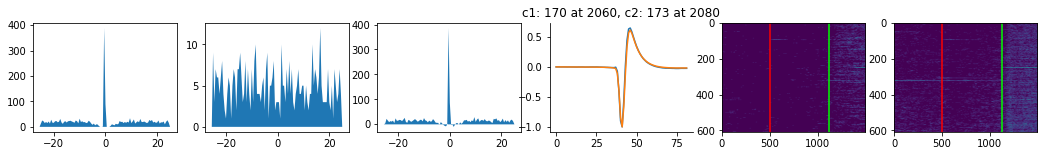

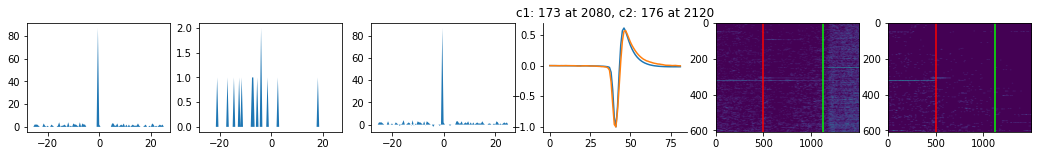

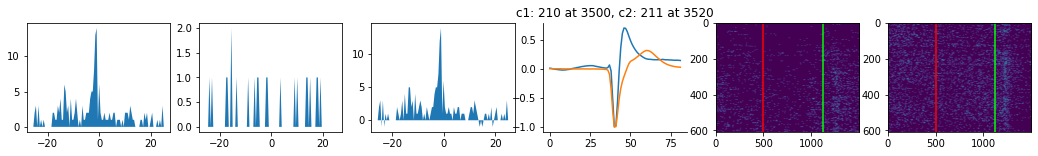

In [129]:
# sessions: 2
cells = np.where((units['location']=='V4') & (units['session']==sessions[2]))[0]

for i in range(len(cells)-1):
    for j in range(i+1,len(cells)): 

        st1 = []; 
        st2 = []; 
        st2_shifted = []; 
        for t in range(len(tNums)): 
            spk1 = np.where((units['spike_times'][cells[i]]>trials['start_time'][tNums[t]]) & 
                            (units['spike_times'][cells[i]]<trials['start_time'][tNums[t]]+1.5))[0]
            st1_now = units['spike_times'][cells[i]][spk1] - trials['start_time'][tNums[t]] + t*2; 

            spk2 = np.where((units['spike_times'][cells[j]]>trials['start_time'][tNums[t]]) & 
                            (units['spike_times'][cells[j]]<trials['start_time'][tNums[t]]+1.5))[0]
            st2_now = units['spike_times'][cells[j]][spk2] - trials['start_time'][tNums[t]] + t*2; 

            if t==0:
                st2_now_shifted = units['spike_times'][cells[j]][spk2] - trials['start_time'][tNums[t]] + (len(tNums)-1)*2; 
            else:
                st2_now_shifted = units['spike_times'][cells[j]][spk2] - trials['start_time'][tNums[t]] + (t-1)*2;                 
            st1.extend(st1_now); 
            st2.extend(st2_now); 
            st2_shifted.extend(st2_now_shifted); 
        st1 = np.array(st1); 
        st2 = np.array(st2); 
        st2_shifted = np.array(st2_shifted); 
        st2_shifted = np.sort(st2_shifted)        

        arr1 = compute_ccg(st1*30000, st2*30000, samp_rate=30000); 
        arr2 = compute_ccg(st1*30000, st2_shifted*30000, samp_rate=30000); 

        hist1, edge = np.histogram(arr1,np.arange(-25.5,25.51,0.5)); 
        hist2, edge = np.histogram(arr2,np.arange(-25.5,25.51,0.5)); 

        if (np.max(stats.zscore(hist1))>5) & (np.max(hist1)>10):
            plt.figure(figsize=(18,2))

            plt.subplot(1,6,1); 
            plt.fill_between(np.arange(-25.5,25.5,0.5), hist1); 

            plt.subplot(1,6,2); 
            plt.fill_between(np.arange(-25.5,25.5,0.5), hist2); 

            plt.subplot(1,6,3); 
            plt.fill_between(np.arange(-25.5,25.5,0.5), hist1-hist2); 

            plt.subplot(1,6,4); 
            depth1 = units['depth'][cells[i]]
            depth2 = units['depth'][cells[j]]
            plt.title(f"c1: {cells[i]} at {depth1}, c2: {cells[j]} at {depth2}"); 
            plt.plot(units['normWF'][cells[i]]); 
            plt.plot(units['normWF'][cells[j]]); 
            plt.gca().spines[['right', 'top']].set_visible(False); 

            plt.subplot(1,6,5);
            plt.imshow(units['psth'][cells[i]],vmin=0, vmax=np.max(units['psth'][cells[i]])*0.5,aspect='auto');   
            plt.axvline(x=500,color=(1,0,0)); 
            plt.axvline(x=500+625,color=(0,1,0));        

            plt.subplot(1,6,6);
            plt.imshow(units['psth'][cells[j]],vmin=0, vmax=np.max(units['psth'][cells[j]])*0.5,aspect='auto');          
            plt.axvline(x=500,color=(1,0,0)); 
            plt.axvline(x=500+625,color=(0,1,0));        

        print(f"cell{cells[i]},{cells[j]} were computed")